In [153]:
import numpy
import pandas
from matplotlib import pyplot
import seaborn
import plotly.express as px
from scipy import stats

import plotly.io as pio
pio.renderers.default = "iframe"


In [154]:
""" Load Data """
df = pandas.read_csv('covid_19_clean_complete.csv' , parse_dates=['Date'])

# Lấy data của Trung
df_china = df[df['Country/Region'] == "China"]

df_china


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [155]:
# Lấy data của khu Hubei bên Trung
df_hubei = df[df['Province/State'] == "Hubei" ]

df_hubei


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
61,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,399,Western Pacific
322,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,399,Western Pacific
583,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,494,Western Pacific
844,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,689,Western Pacific
1105,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,964,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47824,Hubei,China,30.9756,112.2707,2020-07-23,68135,4512,63623,0,Western Pacific
48085,Hubei,China,30.9756,112.2707,2020-07-24,68135,4512,63623,0,Western Pacific
48346,Hubei,China,30.9756,112.2707,2020-07-25,68135,4512,63623,0,Western Pacific
48607,Hubei,China,30.9756,112.2707,2020-07-26,68135,4512,63623,0,Western Pacific


Khám Phá Dữ Liệu Của Toàn Bộ Trung

In [156]:
# 5 Dòng đầu
df_china.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [157]:
# 5 dòng cuối
df_china.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


In [158]:
# thông tin của dataframe
df_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6204 entries, 48 to 48887
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6204 non-null   object        
 1   Country/Region  6204 non-null   object        
 2   Lat             6204 non-null   float64       
 3   Long            6204 non-null   float64       
 4   Date            6204 non-null   datetime64[ns]
 5   Confirmed       6204 non-null   int64         
 6   Deaths          6204 non-null   int64         
 7   Recovered       6204 non-null   int64         
 8   Active          6204 non-null   int64         
 9   WHO Region      6204 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 533.2+ KB


In [159]:
# mô tả dữ liệu
df_china.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,6204.000000,6204.000000,6204,6204.000000,6204.000000,6204.000000,6204.000000
mean,32.887645,111.785991,2020-04-24 12:00:00,2277.885558,108.383785,1848.302063,321.199710
min,19.195900,85.240100,2020-01-22 00:00:00,0.000000,0.000000,0.000000,-6.000000
25%,27.610400,107.874000,2020-03-08 18:00:00,130.000000,1.000000,45.000000,0.000000
50%,31.825700,113.550000,2020-04-24 12:00:00,254.000000,2.000000,172.000000,5.000000
75%,37.895700,117.323000,2020-06-10 06:00:00,788.000000,6.000000,597.000000,53.000000
max,47.862000,127.761500,2020-07-27 00:00:00,68135.000000,4512.000000,64435.000000,50633.000000
std,7.110380,9.335201,NaN,10856.271851,640.883595,9421.524170,2795.515548


Khám Phá Dữ Liệu Của Thành Phố Hubei Bên Trung

In [160]:
# 5 dòng đầu
df_hubei.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
61,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,399,Western Pacific
322,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,399,Western Pacific
583,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,494,Western Pacific
844,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,689,Western Pacific
1105,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,964,Western Pacific


In [161]:
# 5 dòng cuối
df_hubei.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47824,Hubei,China,30.9756,112.2707,2020-07-23,68135,4512,63623,0,Western Pacific
48085,Hubei,China,30.9756,112.2707,2020-07-24,68135,4512,63623,0,Western Pacific
48346,Hubei,China,30.9756,112.2707,2020-07-25,68135,4512,63623,0,Western Pacific
48607,Hubei,China,30.9756,112.2707,2020-07-26,68135,4512,63623,0,Western Pacific
48868,Hubei,China,30.9756,112.2707,2020-07-27,68135,4512,63623,0,Western Pacific


In [162]:
# thông tin của dataframe
df_hubei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 61 to 48868
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  188 non-null    object        
 1   Country/Region  188 non-null    object        
 2   Lat             188 non-null    float64       
 3   Long            188 non-null    float64       
 4   Date            188 non-null    datetime64[ns]
 5   Confirmed       188 non-null    int64         
 6   Deaths          188 non-null    int64         
 7   Recovered       188 non-null    int64         
 8   Active          188 non-null    int64         
 9   WHO Region      188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 16.2+ KB


In [163]:
# mô tả dữ liệu
df_hubei.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,1.880000e+02,188,188.000000,188.000000,188.000000,188.000000
mean,3.097560e+01,1.122707e+02,2020-04-24 12:00:00,61027.914894,3467.723404,49933.606383,7626.585106
min,3.097560e+01,1.122707e+02,2020-01-22 00:00:00,444.000000,17.000000,28.000000,0.000000
25%,3.097560e+01,1.122707e+02,2020-03-08 18:00:00,67734.000000,3002.500000,46174.750000,0.000000
50%,3.097560e+01,1.122707e+02,2020-04-24 12:00:00,68128.000000,4512.000000,63616.000000,17.500000
75%,3.097560e+01,1.122707e+02,2020-06-10 06:00:00,68135.000000,4512.000000,63623.000000,6799.000000
max,3.097560e+01,1.122707e+02,2020-07-27 00:00:00,68135.000000,4512.000000,64435.000000,50633.000000
std,3.562200e-15,1.424880e-14,NaN,18032.612893,1387.002207,23285.611460,14215.940829


Xử Lý Dữ Liệu Cho Toàn Bộ Bên Trung :
(Xử lý dữ liệu trống)   (Xử lý dữ liệu trùng lặp)

In [164]:
# Dếm số lượng trống
df_china.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [165]:
# Đếm số lượng trùng lặp
df_china.duplicated().sum()

np.int64(0)

Xử Lý Dữ Liệu Cho Thành Phố Hubei Của Trung :
(Xử lý dữ liệu trống)   (Xử lý dữ liệu trùng lặp)

In [166]:
# Dếm số lượng trống
df_hubei.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [167]:
# Đếm số lượng trùng lặp
df_hubei.duplicated().sum()

np.int64(0)

Visualize Data

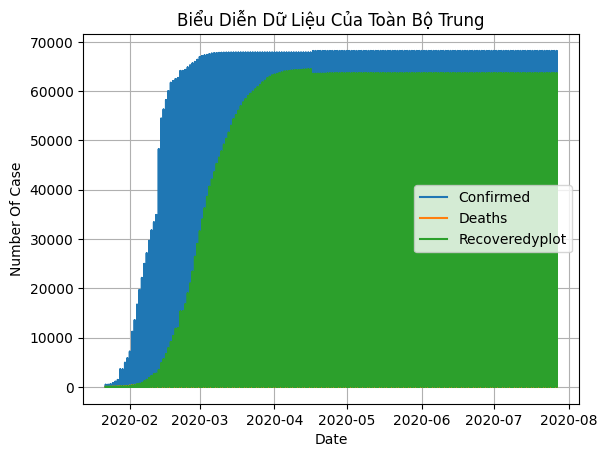

In [200]:
# Ở toàn bộ bên Trung
pyplot.plot(df_china["Date"], df_china["Confirmed"], label="Confirmed")
pyplot.plot(df_china["Date"], df_china["Deaths"], label="Deaths")
pyplot.plot(df_china["Date"], df_china["Recovered"], label="Recoveredyplot")
pyplot.xlabel("Date")
pyplot.ylabel("Number Of Case")
pyplot.legend()
pyplot.title("Biểu Diễn Dữ Liệu Của Toàn Bộ Trung")
pyplot.grid()
pyplot.show()

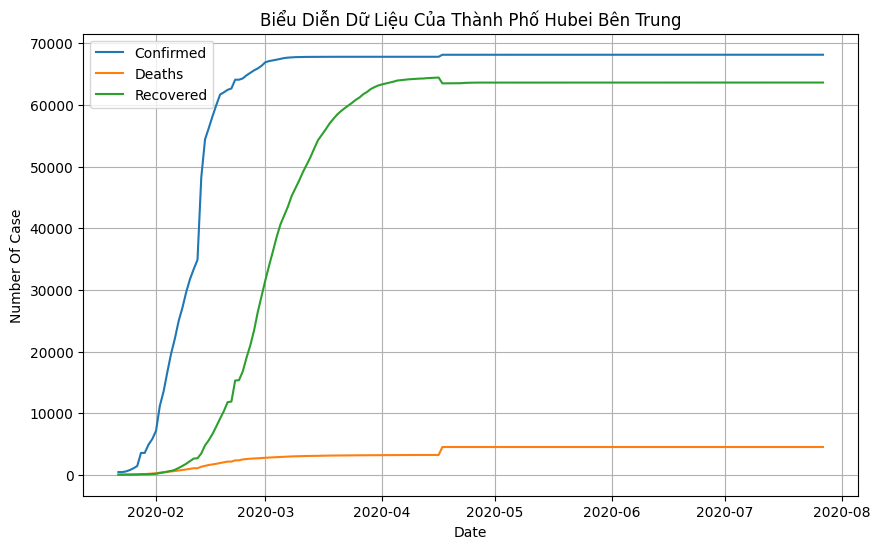

In [201]:
pyplot.figure(figsize=(10,6))
pyplot.plot(df_hubei["Date"], df_hubei["Confirmed"], label="Confirmed")
pyplot.plot(df_hubei["Date"], df_hubei["Deaths"], label="Deaths")
pyplot.plot(df_hubei["Date"], df_hubei["Recovered"], label="Recovered")
pyplot.xlabel("Date")
pyplot.ylabel("Number Of Case")
pyplot.legend()
pyplot.title("Biểu Diễn Dữ Liệu Của Thành Phố Hubei Bên Trung")
pyplot.grid()
pyplot.show()

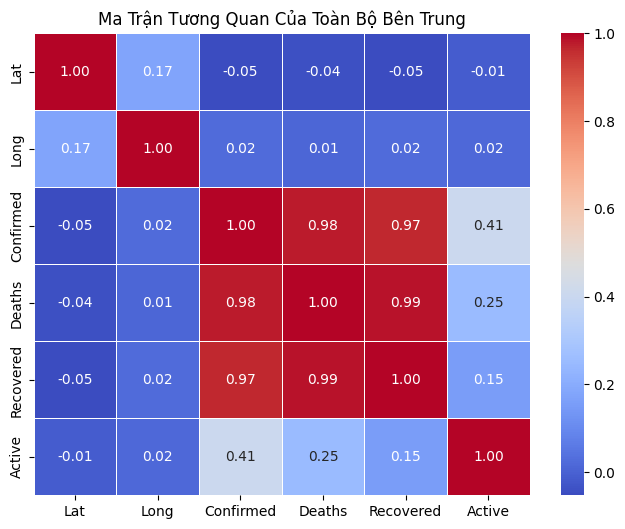

In [202]:
#---Ma trận tương quan ở toàn bộ bên Trung---
pyplot.figure(figsize=(8,6))
# Làm sạch dữ liệu
df_china_clean = df_china[['Lat' , 'Long' , 'Confirmed' , 'Deaths' , 'Recovered' , 'Active']]
corr_china = df_china_clean.corr()
seaborn.heatmap(corr_china , annot=True , cmap='coolwarm' , fmt=".2f", linewidths=.5)
pyplot.title("Ma Trận Tương Quan Của Toàn Bộ Bên Trung")
pyplot.show()

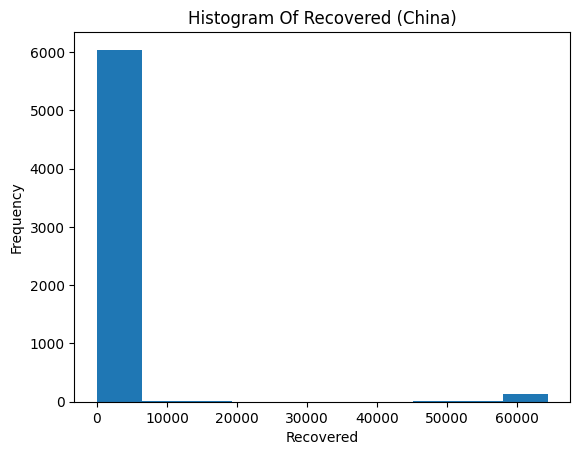

In [205]:
# Histogram
pyplot.hist(df_china['Recovered'])
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.title("Histogram Of Recovered (China)")
pyplot.show()

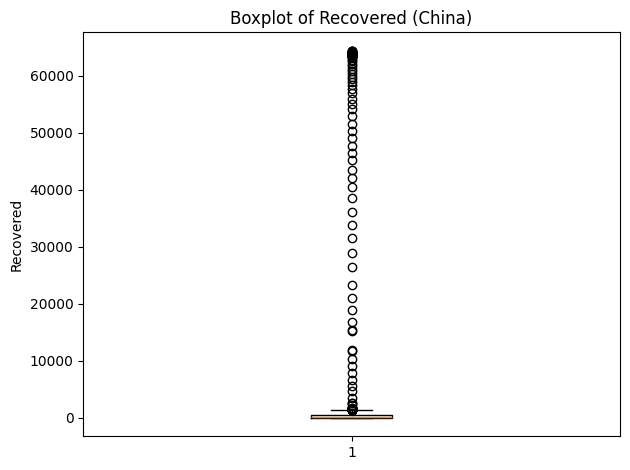

In [ ]:
# Box Plot
pyplot.boxplot(df_china['Recovered'])
pyplot.title("Boxplot of Recovered (China)")
pyplot.ylabel("Recovered")
pyplot.tight_layout()

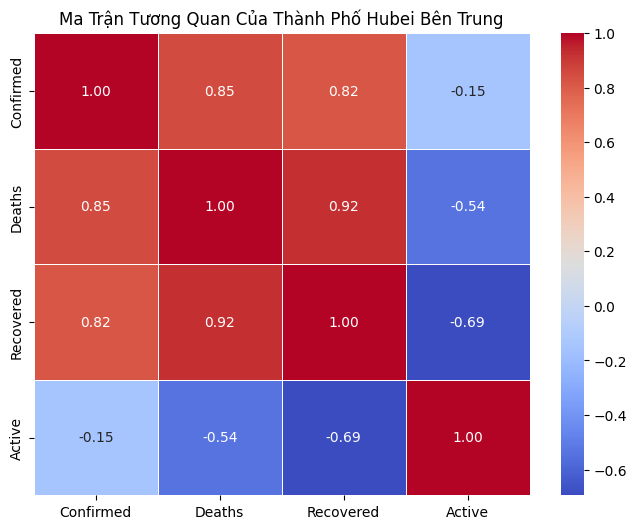

In [203]:
#---Ma trận tương quan ở thành phố Hubei bên Trung---
pyplot.figure(figsize=(8,6))
# Làm sạch dữ liệu
df_hubei_clean = df_hubei[[ 'Confirmed' , 'Deaths' , 'Recovered' , 'Active']]
corr_hubei = df_hubei_clean.corr()
seaborn.heatmap(corr_hubei , annot=True , cmap='coolwarm' , fmt=".2f", linewidths=.5)
pyplot.title("Ma Trận Tương Quan Của Thành Phố Hubei Bên Trung")
pyplot.show()

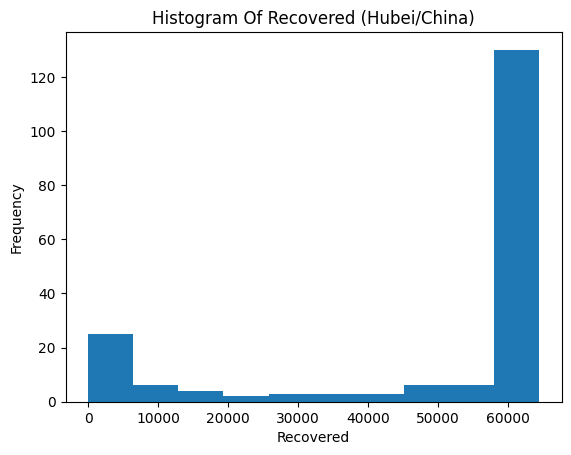

In [206]:
pyplot.hist(df_hubei['Recovered'])
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.title("Histogram Of Recovered (Hubei/China)")
pyplot.show()

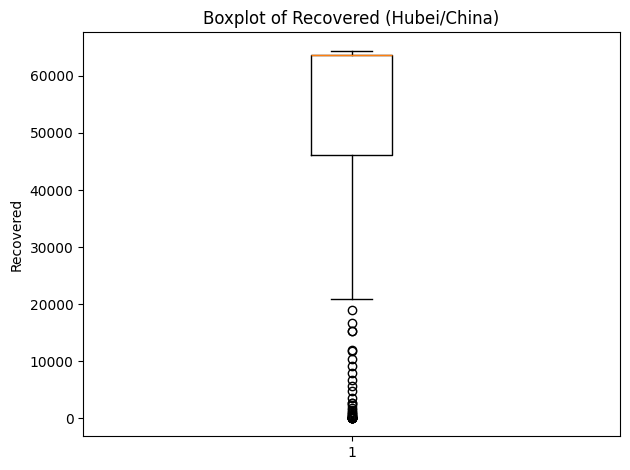

In [208]:
# Box Plot
pyplot.boxplot(df_hubei['Recovered'])
pyplot.title("Boxplot of Recovered (Hubei/China)")
pyplot.ylabel("Recovered")
pyplot.tight_layout()

Tính Toán Mean , Median , Mode  Cho Recovered

In [ ]:
# Tính toán Mean Median Mode cho China
mean_china = numpy.mean(df_china['Recovered'])
print(f'Giá trị mean của recovered cho bên Trung là : {mean_china}')
median_china = numpy.median(df_china['Recovered'])
print(f'Giá trị median của recovered cho bên Trung là : {median_china}')
mode_china = stats.mode(df_china['Recovered'] )
print(f'Giá trị mode của recovered cho bên Trung là : {mode_china.count}')

Giá trị mean của recovered cho bên Trung là : 1848.302063185042
Giá trị median của recovered cho bên Trung là : 172.0
Giá trị mode của recovered cho bên Trung là : 648


In [ ]:
# Tính toán Mean Median Mode cho Hubei
mean_hubei = numpy.mean(df_hubei['Recovered'])
print(f'Giá trị mean của recovered cho Hubei bên Trung là : {mean_hubei}')
median_hubei = numpy.median(df_hubei['Recovered'])
print(f'Giá trị median của recovered cho Hubei bên Trung là : {median_hubei}')
mode_hubei = stats.mode(df_hubei['Recovered'] )
print(f'Giá trị mode của recovered cho Hubei bên Trung là : {mode_hubei.count}')

Giá trị mean của recovered cho Hubei bên Trung là : 49933.60638297872
Giá trị median của recovered cho Hubei bên Trung là : 63616.0
Giá trị mode của recovered cho Hubei bên Trung là : 54
